### Merced Formation bedding data
This notebook summarizes and analyzes bedding data from the Merced Formation for each paleomagnetic locality.

In [83]:
import sys
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import folium

import mplstereonet
%matplotlib inline

In [2]:
NSH_planes = pd.read_csv('../data/bedding/NSH_plane.csv')
LK_planes = pd.read_csv('../data/bedding/LK_plane.csv')
planes = pd.concat([NSH_planes, LK_planes], ignore_index=True)

In [3]:
planes = planes[[' latitude', ' longitude', ' planeType', ' dip', ' dipAzimuth', ' strike', ' unitId']]
planes = planes[planes[' planeType'] == ' Bedding']
planes.head(10)

,latitude,longitude,planeType,dip,dipAzimuth,strike,unitId
0,37.680193,-122.495801,Bedding,64.672821,22.728357,292.728363,Merced
1,37.680263,-122.495785,Bedding,62.130707,25.885866,295.885864,Merced
2,37.680195,-122.495780,Bedding,70.447128,27.046228,297.046234,Merced
3,37.680014,-122.495766,Bedding,65.964752,30.756609,300.756592,Merced
4,37.680021,-122.495778,Bedding,66.123344,28.047262,298.047272,Merced
5,37.679978,-122.495745,Bedding,70.181664,12.116354,282.116364,Merced
6,37.679459,-122.495772,Bedding,69.059509,32.283783,302.283783,Merced
7,37.679873,-122.495713,Bedding,71.031914,31.003050,301.003052,Merced
8,37.679884,-122.495709,Bedding,71.242256,31.672228,301.672241,Merced
9,37.679660,-122.495760,Bedding,63.080193,34.797073,304.797058,Merced


In [4]:
planes.columns

Index([' latitude', ' longitude', ' planeType', ' dip', ' dipAzimuth',
       ' strike', ' unitId'],
      dtype='object')

In [5]:
planes['pole_trend'] = (planes[' dipAzimuth']+180)%360
planes['pole_plunge'] = 90-planes[' dip']
planes.head()

,latitude,longitude,planeType,dip,dipAzimuth,strike,unitId,pole_trend,pole_plunge
0,37.680193,-122.495801,Bedding,64.672821,22.728357,292.728363,Merced,202.728357,25.327179
1,37.680263,-122.495785,Bedding,62.130707,25.885866,295.885864,Merced,205.885866,27.869293
2,37.680195,-122.495780,Bedding,70.447128,27.046228,297.046234,Merced,207.046228,19.552872
3,37.680014,-122.495766,Bedding,65.964752,30.756609,300.756592,Merced,210.756609,24.035248
4,37.680021,-122.495778,Bedding,66.123344,28.047262,298.047272,Merced,208.047262,23.876656


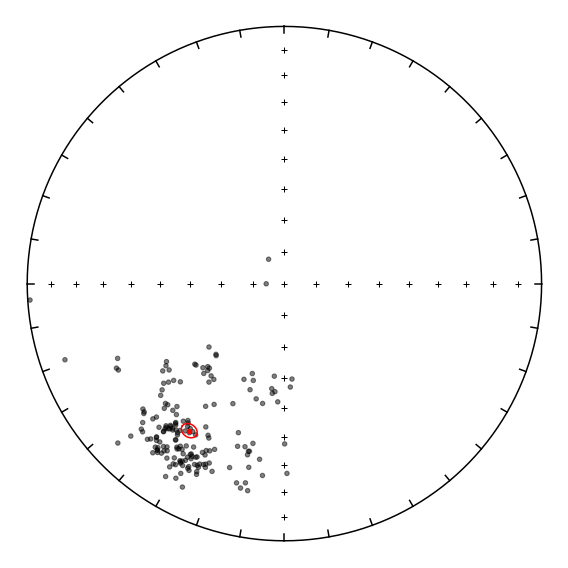

In [6]:
bedding_pole_trend = planes['pole_trend'].tolist()
bedding_pole_plunge = planes['pole_plunge'].tolist()

fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)
ipmag.plot_di(bedding_pole_trend,bedding_pole_plunge,alpha=0.5)

bedding_poles_mean = ipmag.fisher_mean(bedding_pole_trend,bedding_pole_plunge)
ipmag.plot_di_mean(bedding_poles_mean['dec'],bedding_poles_mean['inc'],
                   bedding_poles_mean['alpha95'],color='red')

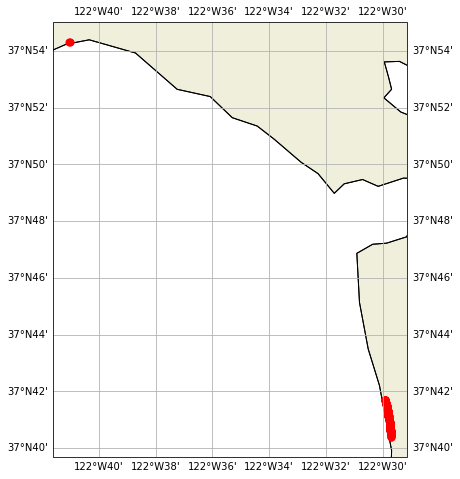

In [7]:
# Create a map using Cartopy
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Plotting the points from the planes DataFrame
ax.scatter(planes[' longitude'], planes[' latitude'], color='red', s=50)

# Display the map
plt.show()

In [8]:
# Create a basic folium map centered around the average latitude and longitude of your data
m = folium.Map(location=[planes[' latitude'].mean(), planes[' longitude'].mean()], zoom_start=4)

# Add markers for each point
for _, row in planes.iterrows():
    folium.Marker([row[' latitude'], row[' longitude']]).add_to(m)

# Display the map
m

In [9]:
LK_notes = pd.read_csv('../data/bedding/LK_note.csv')
LK_notes

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
0,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,14c9929367fcc1e1b4be8de970e60215,544445.129717,4.170594e+06,37.681468,-122.495950,10S,8.209799,6.924182,-1.0,Wed Nov 8 15:54:07 2023,MF16-20
1,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,86d318277dfc83be3d0223eb29976396,544444.358140,4.170582e+06,37.681359,-122.495959,10S,7.380079,8.357161,-1.0,Wed Nov 8 15:51:38 2023,MF16-19
2,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,4ab6bf33513e63dfe5e1275fc2b0da59,544446.713463,4.170565e+06,37.681208,-122.495934,10S,7.386990,8.527501,-1.0,Wed Nov 8 15:48:35 2023,MF16-18
3,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,a7a5d6aaede15447cbc70b0447670279,544443.805578,4.170558e+06,37.681150,-122.495967,10S,7.733982,8.308188,-1.0,Wed Nov 8 15:45:55 2023,MF16-17
4,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,c4afd57e9c7956609618e58e83874c7f,544448.372397,4.170539e+06,37.680973,-122.495916,10S,2.825182,5.083590,-1.0,Wed Nov 8 15:43:03 2023,MF16-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,6a44c37c839de849a15415d120e52224,Locality 1,21588da6ad7a8ab1ff09e7624e722ce1,544470.696738,4.170432e+06,37.680010,-122.495670,10S,10.766950,8.788131,-1.0,Sun Jul 24 12:56:50 2022,dune scale cross bedding in medium sand with...
66,6a44c37c839de849a15415d120e52224,Locality 1,3b971e51ee6a68c451c15d9398ebd6ae,544473.465969,4.170296e+06,37.678785,-122.495647,10S,3.299499,4.789347,-1.0,Sun Jul 24 12:45:14 2022,thin bed of organic rich lignitic sand (backs...
67,6a44c37c839de849a15415d120e52224,Locality 1,b4b2cfdac36a030791038fd34dbc4e53,544465.062389,4.170270e+06,37.678548,-122.495744,10S,7.006367,6.828471,-1.0,Sun Jul 24 12:39:12 2022,thick shell and pebble beds some intermixed
68,6a44c37c839de849a15415d120e52224,Locality 1,67c5a85b1282deff3712879fb8ee7864,544478.057237,4.170153e+06,37.677498,-122.495603,10S,6.573036,6.065840,-1.0,Sun Jul 24 12:21:16 2022,more lenticular shell beds


In [10]:
def bedding_map(locality_planes, locality_location):
    # Create a basic folium map centered around the average latitude and longitude of your data
    m = folium.Map(location=[planes[' latitude'].mean(), planes[' longitude'].mean()], zoom_start=10)

    # Add markers for each point
    for _, row in locality_planes.iterrows():
        tooltip_text = f"Latitude: {row[' latitude']}"
        folium.Marker(
            [row[' latitude'], row[' longitude']],
            tooltip=tooltip_text
        ).add_to(m)

    folium.CircleMarker(
        location=[locality_location[' latitude'], locality_location[' longitude']],
        radius=6,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

    # Display the map
    return m

In [11]:
def bedding_stats(locality, locality_planes):
    bedding_pole_trend = locality_planes['pole_trend'].tolist()
    bedding_pole_plunge = locality_planes['pole_plunge'].tolist()

    fignum = 1
    plt.figure(num=fignum,figsize=(8,8))
    ipmag.plot_net(fignum)
    ipmag.plot_di(bedding_pole_trend,bedding_pole_plunge,alpha=0.5)

    bedding_poles_mean = ipmag.fisher_mean(bedding_pole_trend,bedding_pole_plunge)
    ipmag.plot_di_mean(bedding_poles_mean['dec'],bedding_poles_mean['inc'],
                       bedding_poles_mean['alpha95'],color='red')

    strike = bedding_poles_mean['dec'] + 90
    dip = 90 - bedding_poles_mean['inc']
    print(f"{locality} Strike: {strike}")
    print(f"{locality} Dip: {dip}")

## MF2

In [12]:
# Filter rows where 'notes' column contains the word 'MF2'
MF2_location = LK_notes[LK_notes[' notes'].str.contains('Location of MF2', case=False, na=False)]

MF2_location

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
43,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,1bbc81170addc9134df9b3d2bc475e22,544224.013551,4.172091e+06,37.69497,-122.498367,10S,7.212438,6.67022,-1.0,Mon Mar 27 11:36:29 2023,Location of MF2


In [13]:
MF2_planes = planes[(planes[' latitude']>37.694) & (planes[' latitude']<37.695)]
MF2_planes

,latitude,longitude,planeType,dip,dipAzimuth,strike,unitId,pole_trend,pole_plunge
101,37.694954,-122.498442,Bedding,36.210720,41.565628,311.565613,Merced,221.565628,53.789280
102,37.694948,-122.498436,Bedding,37.180576,41.404278,311.404266,Merced,221.404278,52.819424
103,37.694942,-122.498391,Bedding,31.395401,44.054623,314.054626,Merced,224.054623,58.604599
104,37.694943,-122.498421,Bedding,38.596931,47.341763,317.341766,Merced,227.341763,51.403069
105,37.694955,-122.498410,Bedding,31.664902,43.444523,313.444519,Merced,223.444523,58.335098
106,37.694992,-122.498466,Bedding,38.761650,41.891033,311.891022,Merced,221.891033,51.238350
107,37.694986,-122.498452,Bedding,37.813797,38.465847,308.465851,Merced,218.465847,52.186203
108,37.694974,-122.498434,Bedding,38.190628,36.365772,306.365784,Merced,216.365772,51.809372
109,37.694946,-122.498398,Bedding,31.434504,49.937252,319.937256,Merced,229.937252,58.565496
110,37.694954,-122.498421,Bedding,37.556210,44.092651,314.092651,Merced,224.092651,52.443790


In [14]:
bedding_map(MF2_planes, MF2_location)

MF2 Strike: 313.2369982227617
MF2 Dip: 36.074423461550836


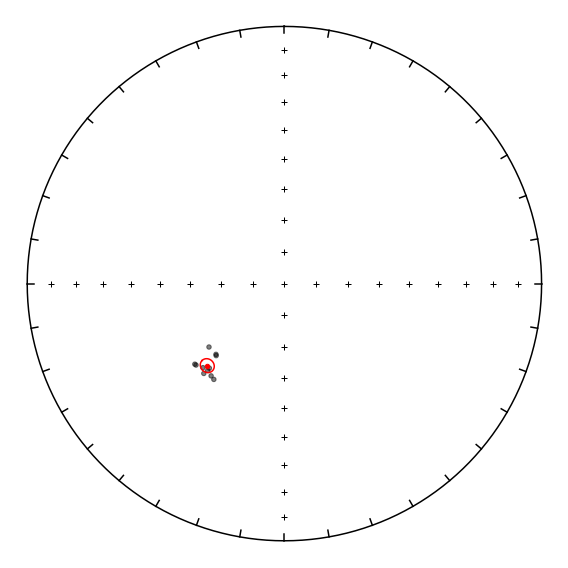

In [15]:
bedding_stats('MF2', MF2_planes)

## MF3

In [16]:
# Filter rows where 'notes' column contains the word 'MF3'
MF3_location = LK_notes[LK_notes[' notes'].str.contains('Location of MF3', case=False, na=False)]

MF3_location

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
42,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,9211cbbfd0e099d78dbd35894b9c4241,544242.409343,4.171920e+06,37.693432,-122.498168,10S,6.813444,6.375085,-1.0,Mon Mar 27 12:59:17 2023,Location of MF3


In [17]:
MF3_planes = planes[(planes[' latitude']>37.69337) & (planes[' latitude']<37.69343)]
MF3_planes = MF3_planes[MF3_planes[' dip']<60]

In [18]:
bedding_map(MF3_planes, MF3_location)

MF3 Strike: 323.7374291729573
MF3 Dip: 47.40680916428261


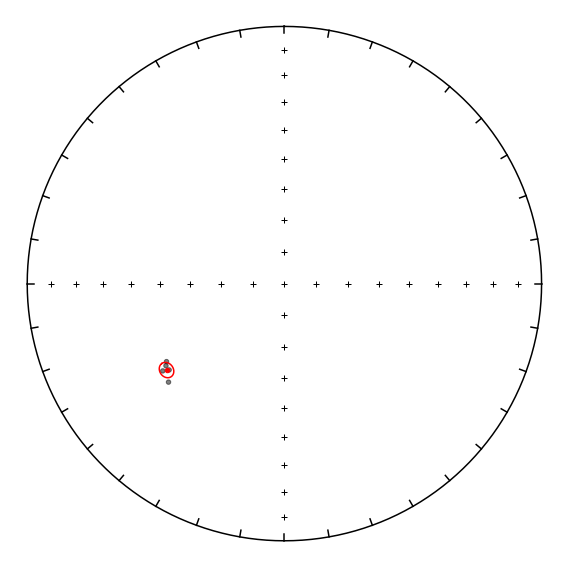

In [19]:
bedding_stats('MF3', MF3_planes)

## MF4

In [20]:
# Filter rows where 'notes' column contains the word 'MF4'
MF4_location = LK_notes[LK_notes[' notes'].str.contains('MF4', case=False, na=False)]

MF4_location

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
39,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,a11e5f2efe7d7fe483b07cc2caa7fd3b,544271.13316,4.171811e+06,37.692445,-122.497849,10S,13.905253,10.114366,-1.0,Mon Mar 27 13:53:03 2023,site MF4


In [21]:
MF4_planes = planes[(planes[' latitude']>37.6924) & (planes[' latitude']<37.6925)]

In [22]:
bedding_map(MF4_planes, MF4_location)

MF4 Strike: 317.19743294617786
MF4 Dip: 50.6033538890737


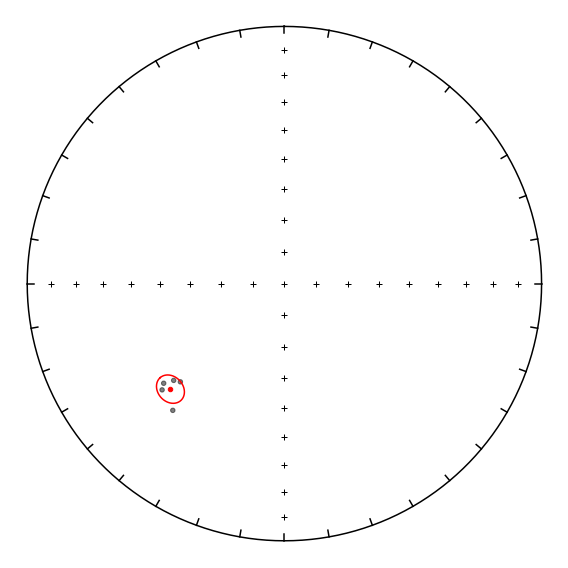

In [23]:
bedding_stats('MF4', MF4_planes)

## MF5

In [24]:
# Filter rows where 'notes' column contains the word 'MF5'
MF5_location = LK_notes[LK_notes[' notes'].str.contains('MF5', case=False, na=False)]

MF5_location

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
38,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,8ca36f2fa528d59112fc52a0225660cb,544291.024852,4.171673e+06,37.691205,-122.497632,10S,0.0,-1.0,-1.0,Mon Mar 27 14:30:03 2023,MF5


In [25]:
MF5_planes = planes[(planes[' latitude']>37.6910) & (planes[' latitude']<37.6913)]

In [26]:
bedding_map(MF5_planes, MF5_location)

MF5 Strike: 317.94945777141186
MF5 Dip: 59.675752440550276


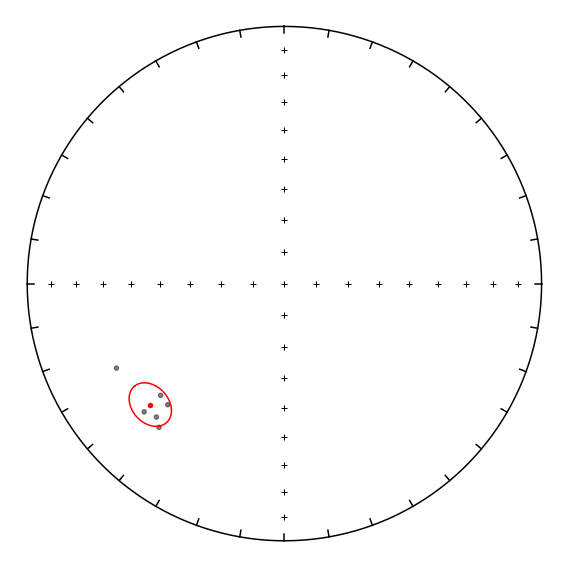

In [27]:
bedding_stats('MF5', MF5_planes)

## MF6

In [28]:
# Filter rows where 'notes' column contains the word 'MF6'
MF6_location = LK_notes[LK_notes[' notes'].str.contains('MF6', case=False, na=False)]

MF6_location

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
37,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,537be373ac35b2e83187ea9506bf5f29,544316.341925,4.171534e+06,37.689952,-122.497353,10S,11.161956,11.579681,-1.0,Mon Mar 27 15:49:36 2023,MF6


In [29]:
MF6_planes = planes[(planes[' latitude']>37.6899) & (planes[' latitude']<37.6901)]

In [30]:
bedding_map(MF6_planes, MF6_location)

MF6 Strike: 307.9845945719767
MF6 Dip: 57.50997468733651


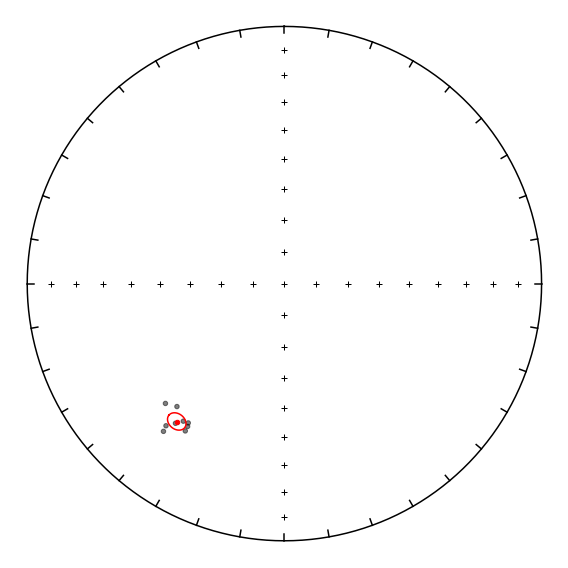

In [31]:
bedding_stats('MF6', MF6_planes)

## MF7

In [32]:
MF7_location = LK_notes[LK_notes[' notes'].str.contains('MF-7', case=False, na=False)]

MF7_location

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
34,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,1b3c6ba596eb030c3368a581f2a6d785,544424.173063,4.170846e+06,37.683742,-122.496172,10S,7.861912,7.711868,-1.0,Thu Jun 1 12:51:44 2023,MF-7


In [33]:
MF7_planes = planes[(planes[' latitude']>37.6835) & (planes[' latitude']<37.6841)]

In [34]:
bedding_map(MF7_planes, MF7_location)

MF7 Strike: 298.16075323842574
MF7 Dip: 62.59337130217318


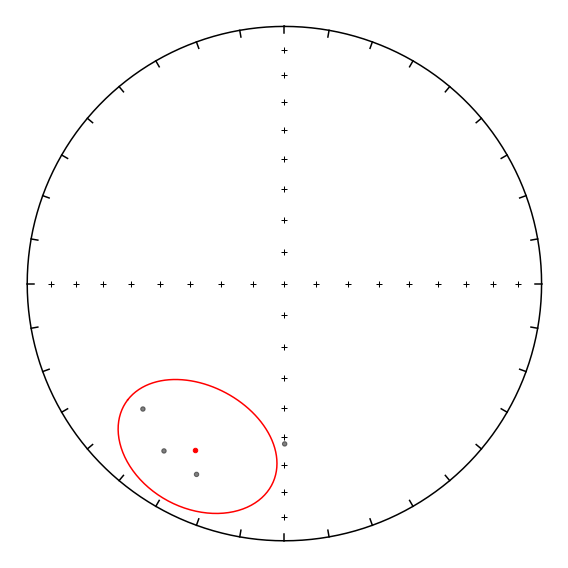

In [35]:
bedding_stats('MF7', MF7_planes)

We will use the MF8 bedding for the MF7 locality as there were not good bedding planes to measure at MF7 and each measurement (shown above) is quite uncertain as a result.

## MF8

In [36]:
MF8_base_location = LK_notes[LK_notes[' notes'].str.contains('MF8', case=False, na=False)]
MF8_top_location = LK_notes[LK_notes[' notes'].str.contains('MF-8', case=False, na=False)]

MF8_base_location

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
33,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,e218189e7aa2869de8800d234568cb15,544391.499644,4.171008e+06,37.685201,-122.496533,10S,7.435166,7.293716,-1.0,Thu Jun 1 13:55:33 2023,base of MF8


In [37]:
MF8_planes = planes[(planes[' latitude']>37.6852) & (planes[' latitude']<37.6872)]
MF8_planes_lower = planes[(planes[' latitude']>37.6852) & (planes[' latitude']<37.6858)]
MF8_planes_upper = planes[(planes[' latitude']>37.6858) & (planes[' latitude']<37.6872)]

In [38]:
# Create a basic folium map centered around the average latitude and longitude of your data
m = folium.Map(location=[planes[' latitude'].mean(), planes[' longitude'].mean()], zoom_start=15, max_zoom=25)

# Add markers for each point
for _, row in MF8_planes.iterrows():
    tooltip_text = f"Latitude: {row[' latitude']}"
    folium.Marker(
        [row[' latitude'], row[' longitude']],
        tooltip=tooltip_text
    ).add_to(m)

folium.CircleMarker(
    location=[MF8_base_location[' latitude'], MF8_base_location[' longitude']],
    radius=6,
    color='red',
    fill=True,
    fill_color='red'
).add_to(m)

folium.CircleMarker(
    location=[MF8_top_location[' latitude'], MF8_top_location[' longitude']],
    radius=6,
    color='red',
    fill=True,
    fill_color='red'
).add_to(m)

# Display the map
m

MF8 Strike: 303.94488533825285
MF8 Dip: 59.76616510282314


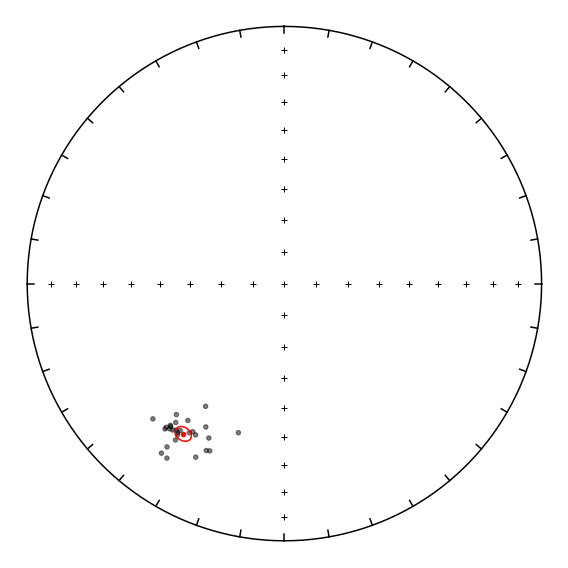

In [39]:
bedding_stats('MF8', MF8_planes)

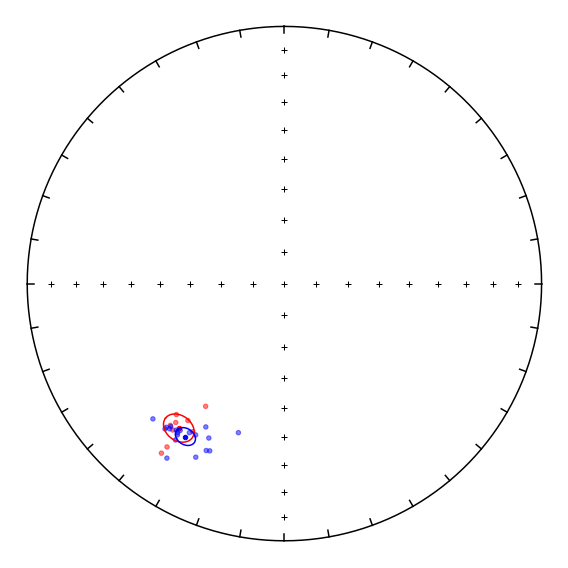

In [40]:
MF8_lower_bedding_pole_trend = MF8_planes_lower['pole_trend'].tolist()
MF8_lower_bedding_pole_plunge = MF8_planes_lower['pole_plunge'].tolist()

fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)
ipmag.plot_di(MF8_lower_bedding_pole_trend,MF8_lower_bedding_pole_plunge,color='red',alpha=0.5)

MF8_lower_bedding_poles_mean = ipmag.fisher_mean(MF8_lower_bedding_pole_trend,MF8_lower_bedding_pole_plunge)
ipmag.plot_di_mean(MF8_lower_bedding_poles_mean['dec'],MF8_lower_bedding_poles_mean['inc'],
                   MF8_lower_bedding_poles_mean['alpha95'],color='red')

MF8_upper_bedding_pole_trend = MF8_planes_upper['pole_trend'].tolist()
MF8_upper_bedding_pole_plunge = MF8_planes_upper['pole_plunge'].tolist()

ipmag.plot_di(MF8_upper_bedding_pole_trend,MF8_upper_bedding_pole_plunge,color='blue',alpha=0.5)

MF8_upper_bedding_poles_mean = ipmag.fisher_mean(MF8_upper_bedding_pole_trend,MF8_upper_bedding_pole_plunge)
ipmag.plot_di_mean(MF8_upper_bedding_poles_mean['dec'],MF8_upper_bedding_poles_mean['inc'],
                   MF8_upper_bedding_poles_mean['alpha95'],color='blue')

## MF9

In [41]:
MF9_location = LK_notes[LK_notes[' notes'].str.contains('MF9', case=False, na=False)]

MF9_location

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
30,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,df6e384e6a3f99c077b2da0be0edc437,544338.067725,4.171372e+06,37.68849,-122.497117,10S,5.821917,7.161484,-1.0,Thu Jun 1 18:06:09 2023,Base of MF9


In [42]:
MF9_planes = planes[(planes[' latitude']>37.6885) & (planes[' latitude']<37.6887)]

In [43]:
bedding_map(MF9_planes, MF9_location)

MF9 Strike: 310.2613987400872
MF9 Dip: 68.93137825575701


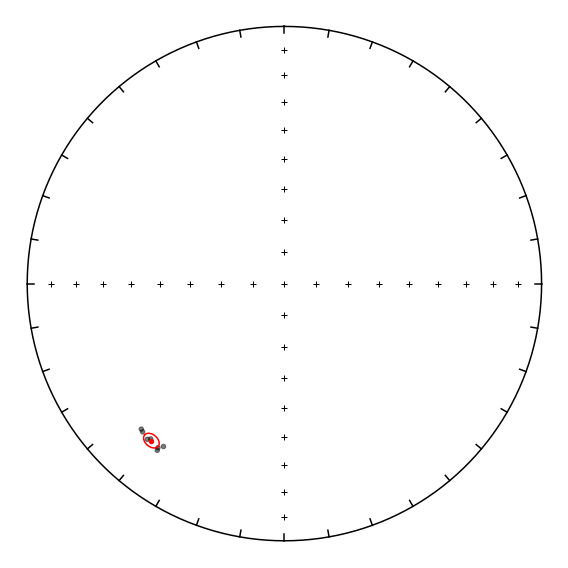

In [44]:
bedding_stats('MF9', MF9_planes)

## MF10

In [45]:
MF10_location = LK_notes[LK_notes[' notes'].str.contains('MF10', case=False, na=False)]

MF10_location

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
24,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,e2248bcc67f931e04f6cb1ff19f15c27,544503.549366,4.169841e+06,37.674677,-122.495333,10S,6.578145,6.563529,-1.0,Wed Nov 8 11:10:32 2023,MF10


In [46]:
MF10_planes = planes[(planes[' latitude']>37.6740) & (planes[' latitude']<37.6750)]

In [47]:
bedding_map(MF10_planes, MF10_location)

MF10 Strike: 284.01610964550844
MF10 Dip: 35.32985067587554


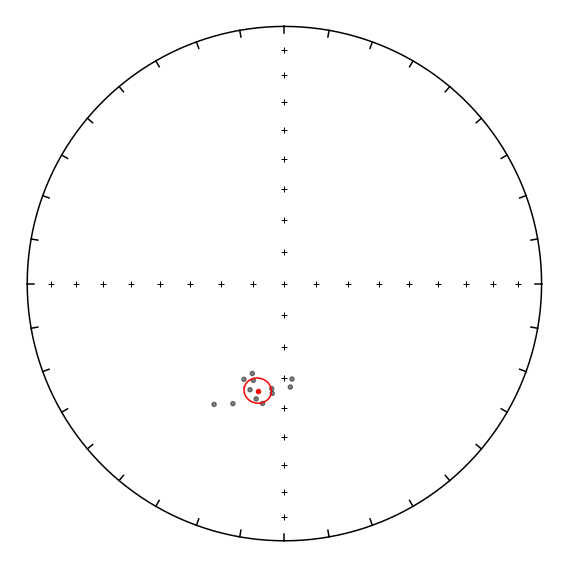

In [48]:
bedding_stats('MF10', MF10_planes)

## MF11

In [49]:
MF11_location = LK_notes[LK_notes[' notes'].str.contains('MF11', case=False, na=False)]

MF11_location

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
23,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,5a1e05612fdc807af15b0279d1651048,544510.118356,4.170054e+06,37.676596,-122.495246,10S,19.559595,11.568955,-1.0,Wed Nov 8 11:36:17 2023,MF11


In [50]:
MF11_planes = planes[(planes[' latitude']>37.6760) & (planes[' latitude']<37.6770)]

In [51]:
bedding_map(MF11_planes, MF11_location)

MF11 Strike: 282.06053147529633
MF11 Dip: 57.279273937819795


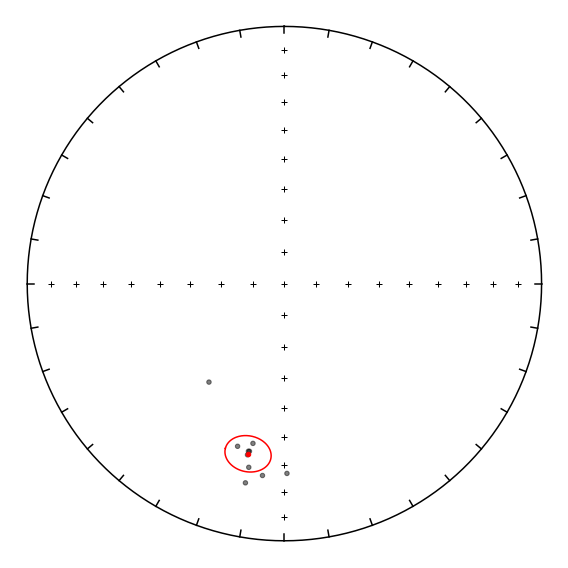

In [52]:
bedding_stats('MF11', MF11_planes)

## MF12

In [53]:
MF12_location = LK_notes[LK_notes[' notes'].str.contains('MF12', case=False, na=False)]

MF12_location

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
22,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,40417950a8dbb0fd8fd2c57e780c446f,544491.167747,4.170137e+06,37.677349,-122.495456,10S,16.239986,12.334322,-1.0,Wed Nov 8 11:58:06 2023,MF12


In [54]:
MF12_planes = planes[(planes[' latitude']>37.6770) & (planes[' latitude']<37.6780)]

In [55]:
bedding_map(MF12_planes, MF12_location)

MF12 Strike: 299.6301083160115
MF12 Dip: 65.622116756141


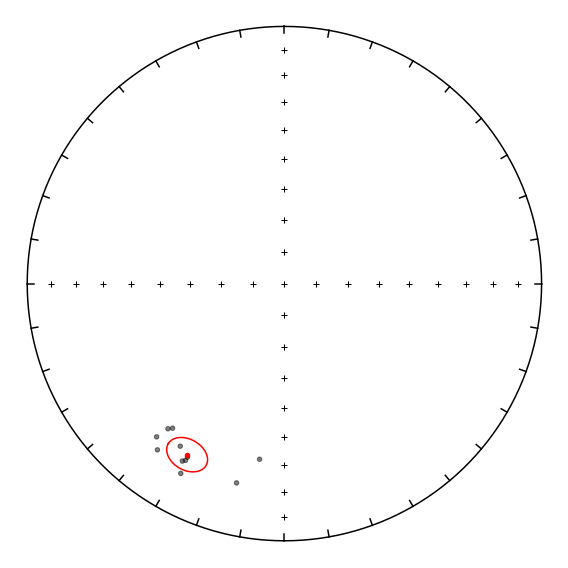

In [56]:
bedding_stats('MF12', MF12_planes)

## MF13

In [57]:
MF13_location = LK_notes[LK_notes[' notes'].str.contains('MF13', case=False, na=False)]

MF13_location

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
21,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,d08ee73dc7d2feff1d10ad38ad41484b,544484.08194,4.170262e+06,37.678473,-122.495528,10S,7.037312,10.671481,-1.0,Wed Nov 8 12:49:48 2023,MF13


In [58]:
MF13_planes = planes[(planes[' latitude']>37.6780) & (planes[' latitude']<37.6790)]

In [59]:
bedding_map(MF13_planes, MF13_location)

MF13 Strike: 302.3130344288432
MF13 Dip: 64.26301451688633


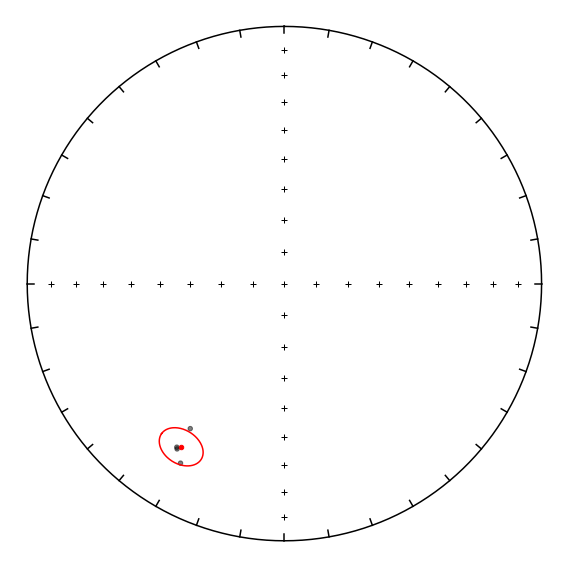

In [60]:
bedding_stats('MF13', MF13_planes)

## MF14

In [61]:
MF14_location = LK_notes[LK_notes[' notes'].str.contains('MF14', case=False, na=False)]

MF14_location

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
20,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,c8720619db4f3c6bd77bac95c526fc90,544468.204144,4.170327e+06,37.679066,-122.495704,10S,7.509646,10.296266,-1.0,Wed Nov 8 14:26:49 2023,MF14


In [62]:
bedding_map(planes, MF14_location)

## MF15

In [63]:
MF15_location = LK_notes[LK_notes[' notes'].str.contains('MF15', case=False, na=False)]

MF15_location

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
19,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,27a978807bb970d9d5e37123a17a2c5e,544466.55887,4.170356e+06,37.67932,-122.495721,10S,2.939228,5.018514,-1.0,Wed Nov 8 14:31:25 2023,MF15


In [64]:
MF15_planes = planes[(planes[' latitude']>37.6885) & (planes[' latitude']<37.6887)]

In [65]:
bedding_map(planes, MF15_location)

We will use the MF16 bedding for MF15 and MF14 as it was difficult to measure bedding at those 2 localities.

## MF16

In [66]:
MF16_base_location = LK_notes[LK_notes[' timedate'].str.contains('14:43:07 2023', case=False, na=False)]
MF16_top_location = LK_notes[LK_notes[' notes'].str.contains('MF16-20', case=False, na=False)]

MF16_base_location

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,timedate,notes
18,2e1fbf3bc84fcebdf33b9e98261e200c,Thornton Beach,a7207ecf0c4a2c3e14b7048d1e90397a,544463.195486,4.170363e+06,37.679386,-122.495759,10S,2.9743,4.997807,-1.0,Wed Nov 8 14:43:07 2023,MF16-1


In [67]:
# Create a basic folium map centered around the average latitude and longitude of your data
m = folium.Map(location=[planes[' latitude'].mean(), planes[' longitude'].mean()], zoom_start=15, max_zoom=25)

# Add markers for each point
for _, row in planes.iterrows():
    tooltip_text = f"Latitude: {row[' latitude']}"
    folium.Marker(
        [row[' latitude'], row[' longitude']],
        tooltip=tooltip_text
    ).add_to(m)

folium.CircleMarker(
    location=[MF16_base_location[' latitude'], MF16_base_location[' longitude']],
    radius=6,
    color='red',
    fill=True,
    fill_color='red'
).add_to(m)

folium.CircleMarker(
    location=[MF16_top_location[' latitude'], MF16_top_location[' longitude']],
    radius=6,
    color='red',
    fill=True,
    fill_color='red'
).add_to(m)

# Display the map
m

In [113]:
MF16_planes = planes[(planes[' latitude']>37.6790) & (planes[' latitude']<37.6816)]
MF16_planes = MF16_planes.reset_index(drop=True)

MF16 Strike: 300.730373745659
MF16 Dip: 66.8938379654904


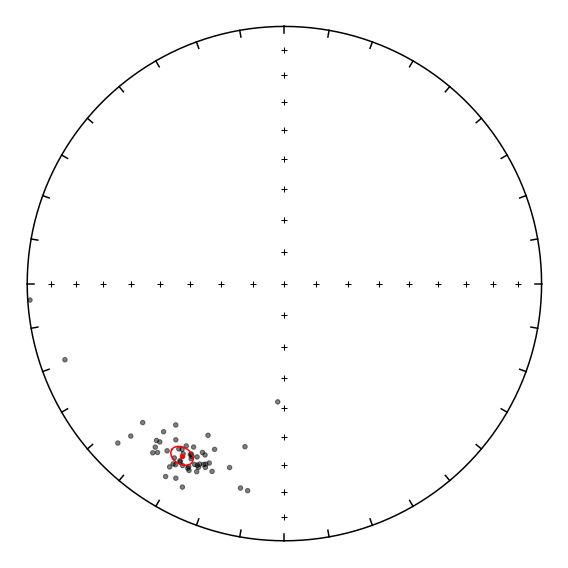

In [115]:
bedding_stats('MF16', MF16_planes)

In [116]:
MF16_planes_upper = planes[(planes[' latitude']>37.6803) & (planes[' latitude']<37.6816)]
MF16_planes_lower = planes[(planes[' latitude']>37.6790) & (planes[' latitude']<37.6803)]

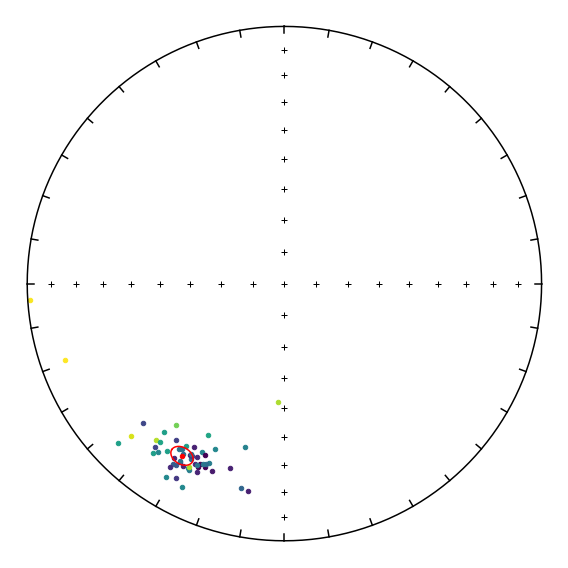

In [117]:
cmap = matplotlib.colormaps['viridis']
norm = matplotlib.colors.Normalize(vmin=np.min(MF16_planes[' latitude']), vmax=np.max(MF16_planes[' latitude']))

MF16_pole_trend = MF16_planes['pole_trend'].tolist()
MF16_pole_plunge = MF16_planes['pole_plunge'].tolist()

fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)
for i in range(0,len(MF16_pole_trend)):
    ipmag.plot_di(MF16_pole_trend[i],MF16_pole_plunge[i], color=cmap(norm(MF16_planes[' latitude'][i])))

MF16_poles_mean = ipmag.fisher_mean(MF16_pole_trend,MF16_pole_plunge)
ipmag.plot_di_mean(MF16_poles_mean['dec'],MF16_poles_mean['inc'],
                    MF16_poles_mean['alpha95'],color='red')

## Plot up all the locality locations

In [72]:
# dataframes = {
#     'MF2': MF2_location,
#     'MF3': MF3_location,
#     'MF4': MF4_location,
#     'MF5': MF5_location,
#     'MF6': MF6_location,
#     'MF7': MF7_location,
locations = {
    'MF2': [MF2_location[' latitude'], MF2_location[' longitude']],
    'MF3': [MF3_location[' latitude'], MF3_location[' longitude']],
    'MF4': [MF4_location[' latitude'], MF4_location[' longitude']],
    'MF5': [MF5_location[' latitude'], MF5_location[' longitude']],
    'MF6': [MF6_location[' latitude'], MF6_location[' longitude']],
    'MF7': [MF7_location[' latitude'], MF7_location[' longitude']],
    'MF8': [MF8_base_location[' latitude'], MF8_base_location[' longitude']],
    'MF9': [MF9_location[' latitude'], MF9_location[' longitude']],
    'MF10': [MF10_location[' latitude'], MF10_location[' longitude']],
    'MF11': [MF11_location[' latitude'], MF11_location[' longitude']],
    'MF12': [MF12_location[' latitude'], MF12_location[' longitude']],
    'MF13': [MF13_location[' latitude'], MF13_location[' longitude']],
    'MF14': [MF14_location[' latitude'], MF14_location[' longitude']],
    'MF15': [MF15_location[' latitude'], MF15_location[' longitude']],
    'MF16': [MF16_base_location[' latitude'], MF16_base_location[' longitude']]
}

# Create folium map centered around the average latitude and longitude
avg_lat = 37.685
avg_lon = -122.4971
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=8)

# Add markers for each location with labels
for label, coords in locations.items():
    folium.Marker(coords, tooltip=label).add_to(m)

m

Stratigraphic position from highest to lowest is:
- MF2
- MF3
- MF4
- MF5
- MF6
- MF9
- MF8
- MF7
- MF16
- MF15
- MF14
- MF13
- MF12
- MF11
- MF10

In [126]:
locality_planes = [MF2_planes,MF3_planes,MF4_planes,MF5_planes,MF6_planes,MF7_planes,MF8_planes,MF9_planes,MF10_planes,MF11_planes,MF12_planes,MF13_planes,MF16_planes]

In [132]:
bedding_poles_dec = []
bedding_poles_inc = []
bedding_poles_a95 = []

for i in range(0,len(locality_planes)):
    bedding_pole_trend = locality_planes[i]['pole_trend'].tolist()
    bedding_pole_plunge = locality_planes[i]['pole_plunge'].tolist()
    bedding_poles_mean = ipmag.fisher_mean(bedding_pole_trend,bedding_pole_plunge)
    bedding_poles_dec = np.append(bedding_poles_dec, bedding_poles_mean['dec'])
    bedding_poles_inc = np.append(bedding_poles_inc, bedding_poles_mean['inc'])
    bedding_poles_a95 = np.append(bedding_poles_a95, bedding_poles_mean['alpha95'])

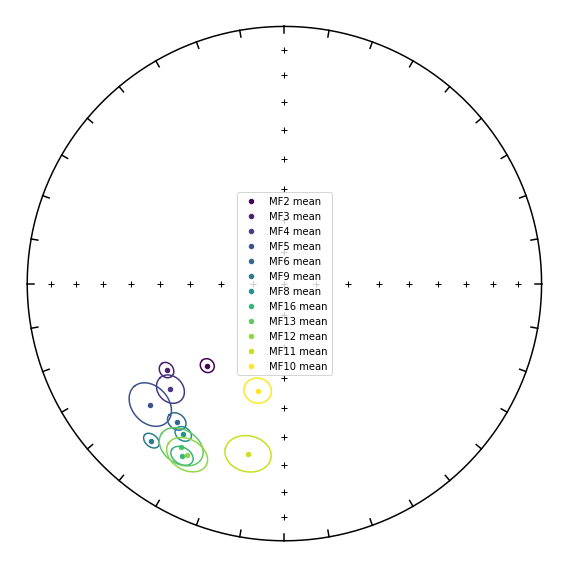

In [139]:
fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)

colors = plt.cm.viridis(np.linspace(0, 1, 13))

ipmag.plot_di_mean(bedding_poles_dec[0],bedding_poles_inc[0],
                   bedding_poles_a95[0],color=colors[0],label='MF2 mean')
ipmag.plot_di_mean(bedding_poles_dec[1],bedding_poles_inc[1],
                   bedding_poles_a95[1],color=colors[1],label='MF3 mean')
ipmag.plot_di_mean(bedding_poles_dec[2],bedding_poles_inc[2],
                   bedding_poles_a95[2],color=colors[2],label='MF4 mean')
ipmag.plot_di_mean(bedding_poles_dec[3],bedding_poles_inc[3],
                   bedding_poles_a95[3],color=colors[3],label='MF5 mean')
ipmag.plot_di_mean(bedding_poles_dec[4],bedding_poles_inc[4],
                   bedding_poles_a95[4],color=colors[4],label='MF6 mean')
ipmag.plot_di_mean(bedding_poles_dec[7],bedding_poles_inc[7],
                   bedding_poles_a95[7],color=colors[5],label='MF9 mean')
ipmag.plot_di_mean(bedding_poles_dec[6],bedding_poles_inc[6],
                   bedding_poles_a95[6],color=colors[6],label='MF8 mean')
#ipmag.plot_di_mean(bedding_poles_dec[5],bedding_poles_inc[5],
                   #bedding_poles_a95[5],color=colors[7],label='MF7 mean')
ipmag.plot_di_mean(bedding_poles_dec[12],bedding_poles_inc[12],
                   bedding_poles_a95[12],color=colors[8],label='MF16 mean')
ipmag.plot_di_mean(bedding_poles_dec[11],bedding_poles_inc[11],
                   bedding_poles_a95[11],color=colors[9],label='MF13 mean')
ipmag.plot_di_mean(bedding_poles_dec[10],bedding_poles_inc[10],
                   bedding_poles_a95[10],color=colors[10],label='MF12 mean')
ipmag.plot_di_mean(bedding_poles_dec[9],bedding_poles_inc[9],
                   bedding_poles_a95[9],color=colors[11],label='MF11 mean')
ipmag.plot_di_mean(bedding_poles_dec[8],bedding_poles_inc[8],
                   bedding_poles_a95[8],color=colors[12],label='MF10 mean')

plt.legend()